# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

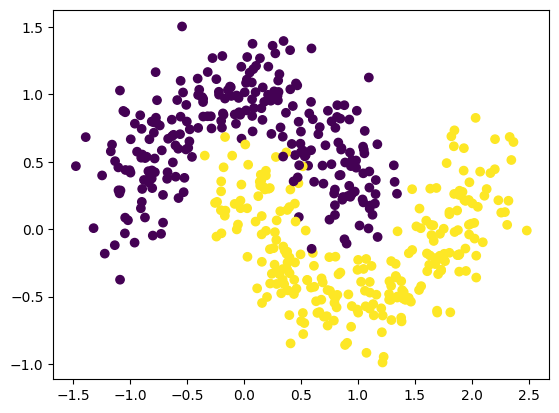

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

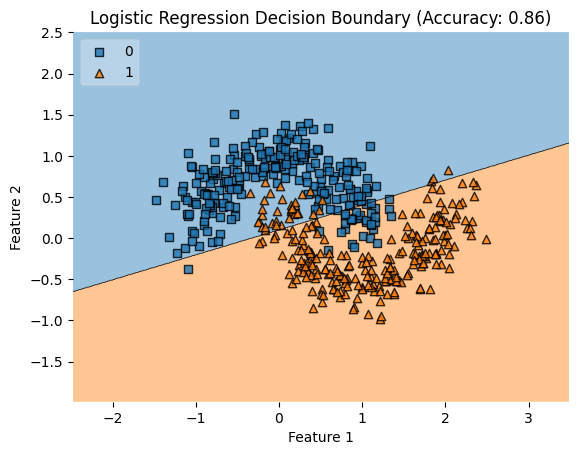

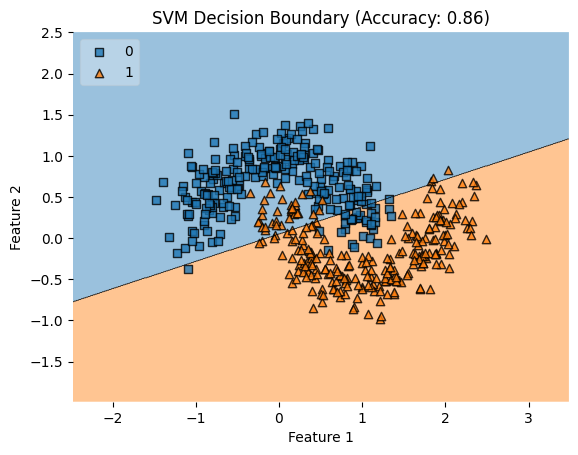

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

def plot_decisions(X, y, model, title):
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

# Train and evaluate Logistic Regression
lr = LogisticRegression(C=1.0, solver='lbfgs', max_iter=200)  # parameters chosen
lr.fit(moons_points, moons_labels)
lr_predictions = lr.predict(moons_points)

lr_accuracy = accuracy_score(moons_labels, lr_predictions)

plot_decisions(moons_points, moons_labels, lr, f'Logistic Regression Decision Boundary (Accuracy: {lr_accuracy:.2f})')

# Train and evaluate Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1.0)  # parameters chosen
svm.fit(moons_points, moons_labels)
svm_predictions = svm.predict(moons_points)

# Calculate metric
svm_accuracy = accuracy_score(moons_labels, svm_predictions)

# Plot decision region for SVM
plot_decisions(moons_points, moons_labels, svm, f'SVM Decision Boundary (Accuracy: {svm_accuracy:.2f})')

Both models exhibit shortcomings in handling the non-linear structure of the moons dataset. Logistic Regression fails to create an adequate separation, and while SVM provides a marginal improvement, it is still not optimal. This indicates that for datasets with non-linear distributions, more sophisticated models or kernel tricks (e.g., polynomial or RBF kernels) may be necessary for improved classification performance.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

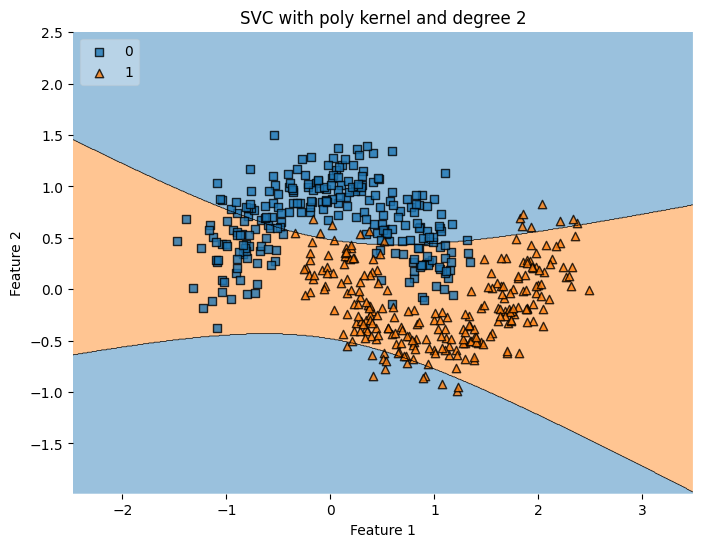

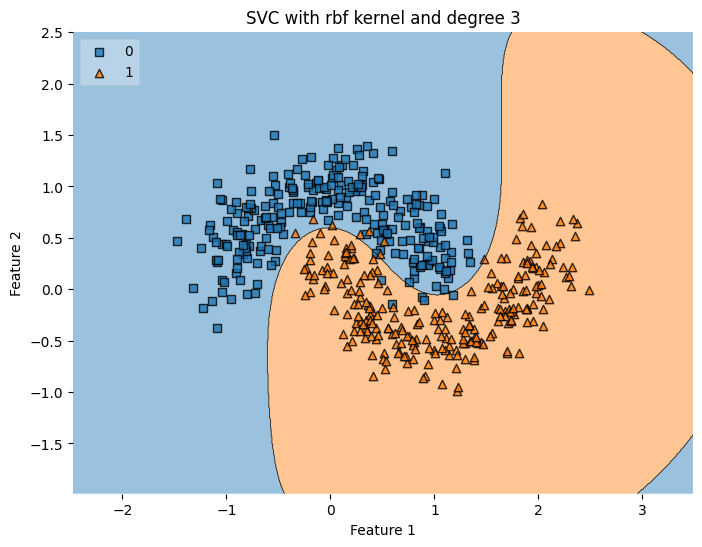

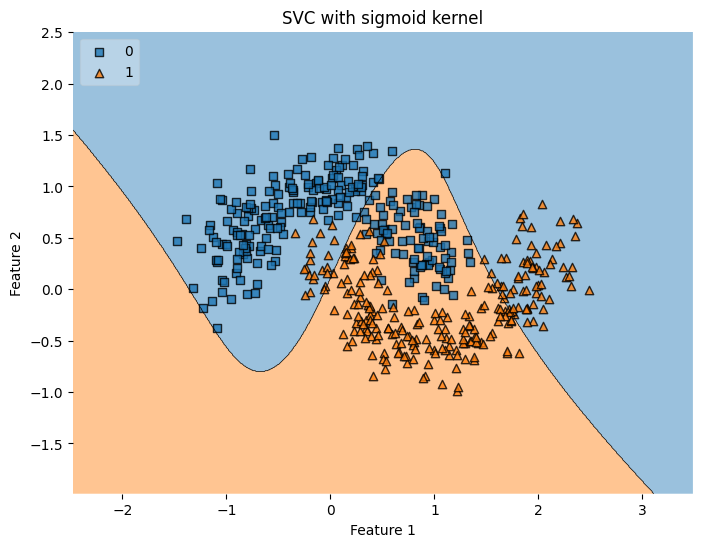

Accuracy for SVC with poly kernel: 0.75
Accuracy for SVC with rbf kernel: 0.97
Accuracy for SVC with sigmoid kernel: 0.65


In [10]:
def evaluate_svckernels(X, y):
    kernels = ['poly', 'rbf', 'sigmoid']
    degrees = [2, 3, None]  # Degree for polynomial kernel

    # Store results for each kernel
    results = {}

    for kernel, degree in zip(kernels, degrees):
        if kernel != 'sigmoid':
          svc = SVC(kernel=kernel, degree=degree, C=1.0, gamma='scale')  # gamma scales with data
        else:
          svc = SVC(kernel=kernel, C=1.0, gamma='scale')  # gamma scales with data
        svc.fit(X, y)
        predictions = svc.predict(X)
        accuracy = accuracy_score(y, predictions)
        results[kernel] = (accuracy, svc)

        # Plot decision boundaries
        plt.figure(figsize=(8, 6))
        plot_decisions(X, y, svc, f'SVC with {kernel} kernel{" and degree " + str(degree) if degree else ""}')

    return results

# Evaluate SVC with different kernels
results = evaluate_svckernels(moons_points, moons_labels)

# Print the results
for kernel, (accuracy, _) in results.items():
    print(f'Accuracy for SVC with {kernel} kernel: {accuracy:.2f}')

### Analysis of Results

1. **Classification Quality**:
   The classification accuracy of the models varies significantly with different kernels. The RBF kernel typically yields the best performance on non-linear datasets like the moons dataset due to its flexibility in drawing complex boundaries. The polynomial kernel's performance may be acceptable but usually requires careful tuning of the degree parameter. The sigmoid kernel often performs the worst in this context due to its shape not fitting the data structure well.

2. **Decision Boundary Changes**:
   - **Polynomial Kernel**: With a degree of 2 or 3, the decision boundary can still be slightly curved, but it struggles to fit complex structures effectively compared to RBF. The degree dictates how flexible the boundary is; higher degrees may lead to overfitting.
   - **RBF Kernel**: This kernel creates a much more flexible, curvilinear decision boundary that can adapt closely to the data's true distribution, often performing best visually and quantitatively.
   - **Sigmoid Kernel**: Generally creates a more linear decision boundary that cannot effectively partition the two moon shapes due to its inherent properties. Accordingly, it usually results in poorer classification performance.

3. **Degree Selection**:
   I chose a degree of **2 or 3** for the polynomial kernel because:
   - **Degree 2** tends to offer a reasonable balance between flexibility and overfitting on many datasets, capturing curvature without being overly complex.
   - **Degree 3** adds more flexibility, which can be beneficial if the data has more pronounced nonlinear features; however, it risks overfitting if the degree is too high relative to the number of samples.
   Therefore, these degrees were selected after understanding typical use cases and balancing performance with model complexity.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.3, random_state=42)

# Create Polynomial Features
degree = 3  # You can experiment with the degree, 3 is often a good choice
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Create Polynomial Features
degree = 3  # You can experiment with the degree, 3 is often a good choice
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)

y_pred_log_reg = log_reg.predict(X_test_poly)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

svm_poly = SVC(kernel='poly', degree=degree)
svm_poly.fit(X_train, y_train)
y_pred_svm = svm_poly.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression Accuracy with Polynomial Features (degree {degree}): {accuracy_log_reg}")
print(f"SVM Accuracy with Polynomial Kernel (degree {degree}): {accuracy_svm}")

Logistic Regression Accuracy with Polynomial Features (degree 3): 0.9533333333333334
SVM Accuracy with Polynomial Kernel (degree 3): 0.9066666666666666


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

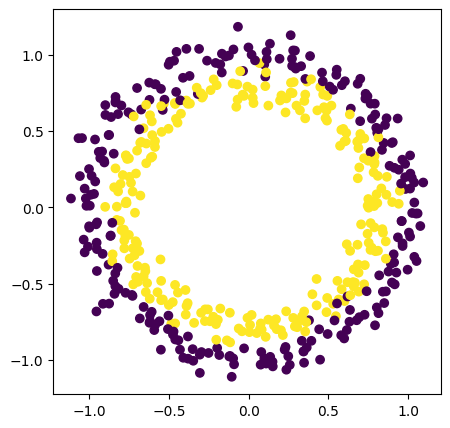

In [23]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

Logistic Regression accuracy: 0.94
SVM accuracy: 0.53


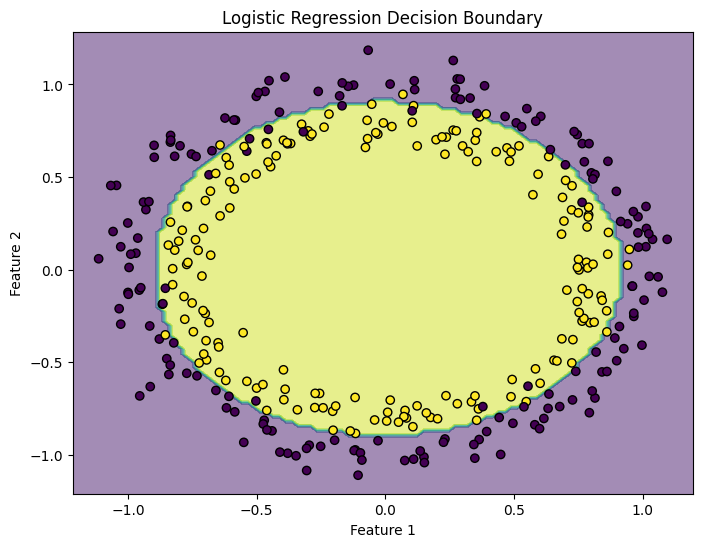

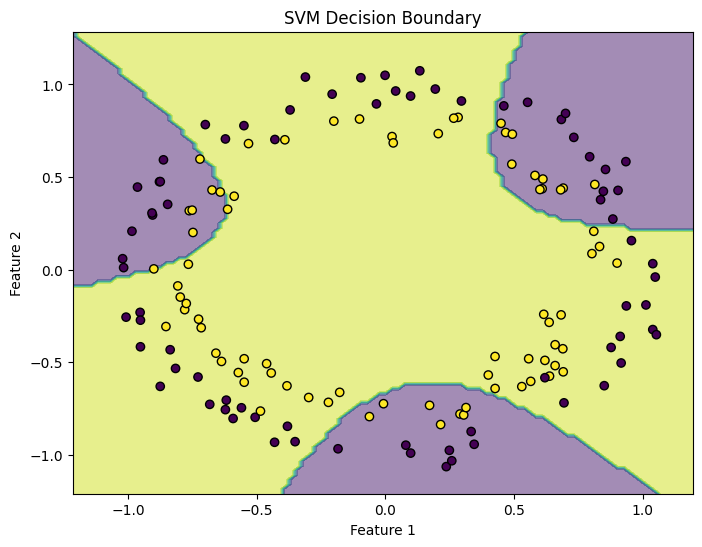

In [27]:
X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=0.3, random_state=42)

# Step 3: Transform the features using PolynomialFeatures
poly = PolynomialFeatures(degree=3)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 4: Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)

# Step 5: Predict and calculate accuracy
y_pred_log_reg = log_reg.predict(X_test_poly)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

# Step 6: Train the SVM model
svm_model = SVC(kernel='poly', degree=3)  # You can adjust the degree as needed
svm_model.fit(X_train, y_train)  # No need for polynomial features here

# Step 7: Predict and calculate SVM accuracy
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Print out the accuracies
print(f"Logistic Regression accuracy: {log_reg_accuracy:.2f}")
print(f"SVM accuracy: {svm_accuracy:.2f}")

# Step 8: Plot decision boundaries for Logistic Regression
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))
    # Create a grid to plot the decision boundary
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1, 100),
                         np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 100))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary for Logistic Regression
plot_decision_boundary(log_reg, X_train, y_train, "Logistic Regression Decision Boundary")

# Plot decision boundary for SVM
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(circles_points[:, 0].min() - 0.1, circles_points[:, 0].max() + 0.1, 100),
                     np.linspace(circles_points[:, 1].min() - 0.1, circles_points[:, 1].max() + 0.1, 100))
Z_svm = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
plt.contourf(xx, yy, Z_svm, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o')
plt.title("SVM Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


And even more:

Logistic Regression Accuracy: 0.90


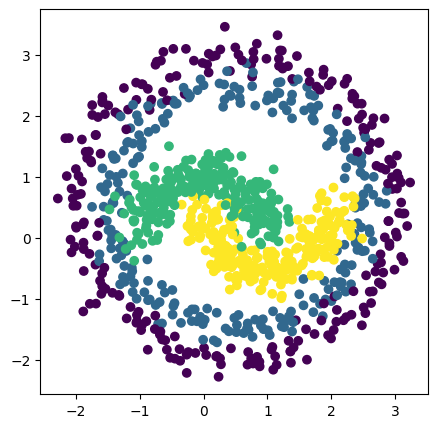

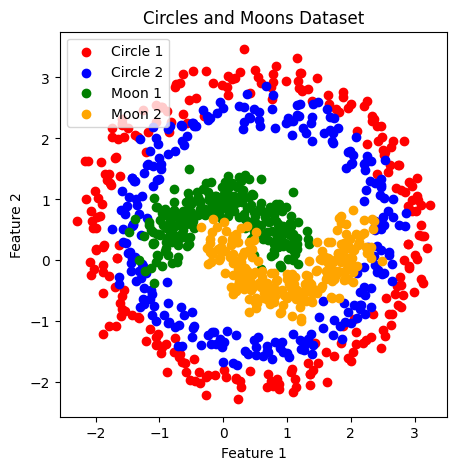

In [29]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

poly = PolynomialFeatures(degree=3)  # Adjust the degree as needed
points_poly = poly.fit_transform(points)  # Transform points to include polynomial features


X_train, X_test, y_train, y_test = train_test_split(points_poly, labels, test_size=0.2, random_state=42)


logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

plt.figure(figsize=(5, 5))
plt.scatter(points[labels == 0, 0], points[labels == 0, 1], color='red', label='Circle 1')
plt.scatter(points[labels == 1, 0], points[labels == 1, 1], color='blue', label='Circle 2')
plt.scatter(points[labels == 2, 0], points[labels == 2, 1], color='green', label='Moon 1')
plt.scatter(points[labels == 3, 0], points[labels == 3, 1], color='orange', label='Moon 2')
plt.title('Circles and Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
### YOUR CODE HERE